In [165]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import preprocessing

import collections

import math
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 150)

In [3]:
df = pd.read_csv('listings.csv')
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [291]:
df.price.describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [4]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
# The shape meaning rows and columns of the dataframe
print(df.shape, '\n' +'#'*60)

#The data types in the dataset
print(df.dtypes.value_counts(), '\n' +'#'*60)


#The column names for the data type float64 
print(df.dtypes[df.dtypes=='float64'], '\n' +'#'*60)

#The column names for the data type int 
print(df.dtypes[df.dtypes=='int64'], '\n' +'#'*60)

#The column names for the data type object
print(df.dtypes[df.dtypes=='object'], '\n' +'#'*60)

(3818, 92) 
############################################################
object     62
float64    17
int64      13
dtype: int64 
############################################################
host_listings_count            float64
host_total_listings_count      float64
latitude                       float64
longitude                      float64
bathrooms                      float64
bedrooms                       float64
beds                           float64
square_feet                    float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
license                        float64
reviews_per_month              float64
dtype: object 
############################################################
id                                int64
scrape_id                      

There are some columns that are of type object, but can be converted to int64 or float 64 because in fact the are numbers (like price columns. be treated as integer or float (especially those price columns). 

We keep that in mind for later, if we use some of them we first convert them into the right type.

##### Missing Values

In [6]:
df.isnull().sum().sort_values(ascending=False)

license                             3818
square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
notes                               1606
neighborhood_overview               1032
cleaning_fee                        1030
transit                              934
host_about                           859
host_acceptance_rate                 773
review_scores_accuracy               658
review_scores_checkin                658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
reviews_per_month                    627
first_review                         627
last_review                          627
space                                569
host_response_time                   523
host_response_rate                   523
neighbourhood   

##### Sole Unque No Missing Values

In [7]:
df.nunique()[df.nunique()==df.shape[0]]

id             3818
listing_url    3818
picture_url    3818
latitude       3818
longitude      3818
dtype: int64

## Analysis

### Focus on the variables with no missing data

In [247]:
df_sub = df[['price','extra_people','guests_included','accommodates','availability_30', 'room_type','bed_type','beds','bathrooms','amenities']]
df_sub

,price,extra_people,guests_included,accommodates,availability_30,room_type,bed_type,beds,bathrooms,amenities
0,85.0,5.0,2,4,14,Entire home/apt,Real Bed,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,150.0,0.0,1,4,13,Entire home/apt,Real Bed,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,975.0,25.0,10,11,1,Entire home/apt,Real Bed,7.0,4.5,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,100.0,0.0,1,3,0,Entire home/apt,Real Bed,2.0,1.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,450.0,15.0,6,6,30,Entire home/apt,Real Bed,3.0,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
...,...,...,...,...,...,...,...,...,...,...
3813,359.0,0.0,1,6,18,Entire home/apt,Real Bed,3.0,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3814,79.0,25.0,3,4,6,Entire home/apt,Real Bed,2.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
3815,93.0,20.0,2,2,29,Entire home/apt,Real Bed,1.0,1.0,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ..."
3816,99.0,0.0,1,2,30,Entire home/apt,Real Bed,1.0,1.0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ..."


In [113]:
def PriceToFloat(df, column_list):
    df_clean = df
    for col in column_list:
        print(col)
        if df.dtypes[col] == object:
            df_clean[col] = df[col].str.replace('$','').str.replace('€', '').str.replace(',','')
            df_clean[col].fillna(0, inplace = True)
            df_clean[col] = df_clean[col].astype(float)
            
    return df_clean

In [248]:
df_clean = PriceToFloat(df_sub, ['price','extra_people'])
df_clean['price']

price
extra_people


0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

#### Question 1: Are accomendations with more bed rooms in general cheaper per person?

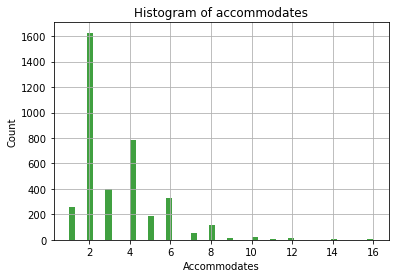

In [249]:
# the histogram of the data
n, bins, patches = plt.hist(df.accommodates, 50, density=False, facecolor='g', alpha=0.75)

plt.xlabel('Accommodates')
plt.ylabel('Count')
plt.title('Histogram of accommodates')
plt.grid(True)
plt.show()

In [250]:
def calcFullyBookedPrice(df):
    resultList = list()
    for row in range(df.shape[0]):
        extracharge = (df['accommodates'][row]-df['guests_included'][row]) * df['extra_people'][row]
        FullyBookedPrice = df['price'][row] + extracharge
        resultList.append(FullyBookedPrice)
    df["FullyBookedPrice"] = resultList
    return df

In [251]:
df_clean = calcFullyBookedPrice(df_clean)
df_clean['PricePerPerson'] = df_clean['FullyBookedPrice']/df_clean['accommodates']

<ipython-input-250-e2dc84c071b1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FullyBookedPrice"] = resultList
<ipython-input-251-696e39233047>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['PricePerPerson'] = df_clean['FullyBookedPrice']/df_clean['accommodates']


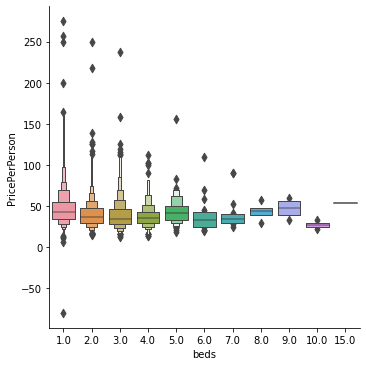

In [252]:
sns.catplot(data=df_clean, x="beds", y="PricePerPerson", kind="boxen");

According to the simple analysis seen above in the box plot it seems not like in general more bed rooms seem to decrease the price per person. But it can be seen that the variance is getting lower with a higher beds size.
This can have many reasons but a easy guess is that the variance is lower since there is less data in the dataset with higher bed size.

#### Question 2: Which amenities are most offered in appartments?

In [253]:
def countListOfStrings(df, searchColumn):
    new_list = list()
    for row in range(df.shape[0]):
        arr = df[searchColumn][row].split(',')
        for v in arr:
            v_clean = v.replace('{', '').replace('}','').replace('"','')
            new_list.append(v_clean)
    return new_list

def plotCount(df, searchColumn):
    temp_list = countListOfStrings(df,searchColumn)
    plt.figure(figsize=(12,8))
    sns.countplot(y = countListOfStrings(df,searchColumn),
                  order = [elem for count, elem in sorted(((temp_list.count(e), e) for e in set(temp_list)), reverse=True)],
                  );

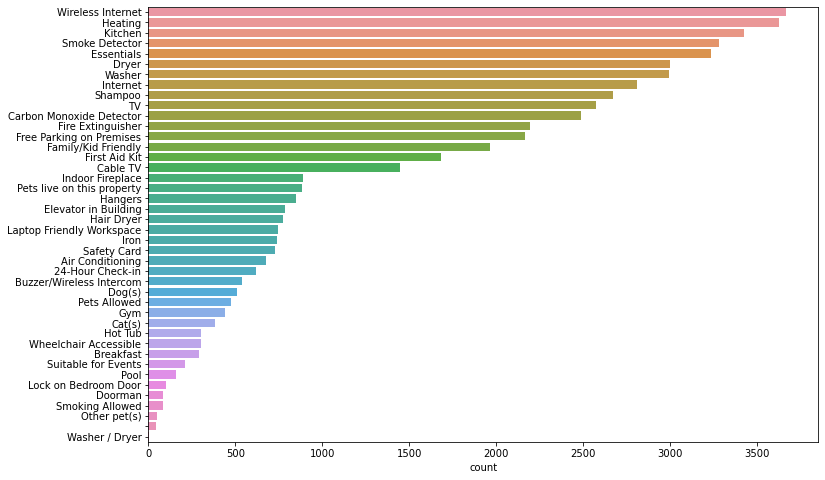

In [254]:
plotCount(df_clean,'amenities')

As it can be seen in the countplot above the most common amenities in the dataset listed are:
+ Wireless Internet
+ Heating
+ Kitchen
+ Internet
+ Smoke Detector

And the least common amenities listed are:

+ Lock on Bedroom Door
+ Doorman
+ Smoking Allowed
+ Other pet(s)
+ Washer / Dryer

Also in the lower area a blank thing is reported, but this is due to data errors and is omitted in further analysis.

#### Question 3: Is it possible to predict the AirBnB price by using a simple sub sample of features in a basic Random Forest Regression?

#### Make ML dataframe subset

In [255]:
df_model = df_clean.dropna()

Drop the missing values since there are only 10 in the dataset not imputation methods are applied.

In [256]:
# Get the output values that should be predicted
y = df_model['price']

# Get the feature values that should be used to predict
X = df_model[['extra_people','guests_included','accommodates','availability_30', 'room_type','bed_type','beds','bathrooms','amenities']]
X

,extra_people,guests_included,accommodates,availability_30,room_type,bed_type,beds,bathrooms,amenities
0,5.0,2,4,14,Entire home/apt,Real Bed,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,0.0,1,4,13,Entire home/apt,Real Bed,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,25.0,10,11,1,Entire home/apt,Real Bed,7.0,4.5,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,0.0,1,3,0,Entire home/apt,Real Bed,2.0,1.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,15.0,6,6,30,Entire home/apt,Real Bed,3.0,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
...,...,...,...,...,...,...,...,...,...
3813,0.0,1,6,18,Entire home/apt,Real Bed,3.0,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3814,25.0,3,4,6,Entire home/apt,Real Bed,2.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
3815,20.0,2,2,29,Entire home/apt,Real Bed,1.0,1.0,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ..."
3816,0.0,1,2,30,Entire home/apt,Real Bed,1.0,1.0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ..."


In [257]:
# limit to categorical data using df.select_dtypes()
X_cat = X.select_dtypes(include=[object])
X_cat

,room_type,bed_type,amenities
0,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,Entire home/apt,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
...,...,...,...
3813,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3814,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
3815,Entire home/apt,Real Bed,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ..."
3816,Entire home/apt,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ..."


#### Label encode

In [258]:
# TODO: create a LabelEncoder object and fit it to each feature in X

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = X_cat.apply(le.fit_transform)
X_2.head()

,room_type,bed_type,amenities
0,0,4,1463
1,0,4,2719
2,0,4,1346
3,0,4,862
4,0,4,2051


In [259]:
X_non_cat = X.select_dtypes(exclude=[object])
X_non_cat

,extra_people,guests_included,accommodates,availability_30,beds,bathrooms
0,5.0,2,4,14,1.0,1.0
1,0.0,1,4,13,1.0,1.0
2,25.0,10,11,1,7.0,4.5
3,0.0,1,3,0,2.0,1.0
4,15.0,6,6,30,3.0,2.0
...,...,...,...,...,...,...
3813,0.0,1,6,18,3.0,2.0
3814,25.0,3,4,6,2.0,1.0
3815,20.0,2,2,29,1.0,1.0
3816,0.0,1,2,30,1.0,1.0


#### Merge label encoded with other features

In [260]:
X = pd.concat([X_non_cat, X_2], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3802 entries, 0 to 3817
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   extra_people     3802 non-null   float64
 1   guests_included  3802 non-null   int64  
 2   accommodates     3802 non-null   int64  
 3   availability_30  3802 non-null   int64  
 4   beds             3802 non-null   float64
 5   bathrooms        3802 non-null   float64
 6   room_type        3802 non-null   int32  
 7   bed_type         3802 non-null   int32  
 8   amenities        3802 non-null   int32  
dtypes: float64(3), int32(3), int64(3)
memory usage: 252.5 KB


#### Split into train and test dataset

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0 )

#### Train the model

In [287]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 20)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

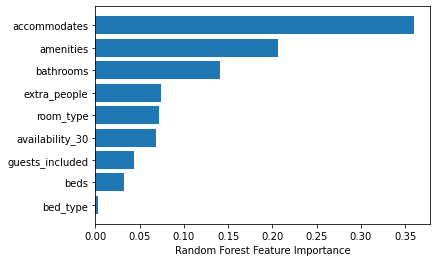

In [288]:
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance");

<b> ->  </b> Here the accommdates seems to be the most important variable, but this need to be considered carefully. Because the price is not the total price with all extra guest but the price for the included guests.

#### Calculate the loss after training 

In [289]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 38.63212180486327
Mean Squared Error: 3950.7524032781744
Root Mean Squared Error: 62.855010963949205


The model to predict the price seems to have a poor quality and seems far away from being perfect. A standard error of 62 for a price of averaging 127 is not very helpful. Also the standard deviation of the varialbe of interest overall is 90. To increase the model further, considerations mentioned above should be taken care of as well as some further features engineering and using maybe more or other features. So it can be said that by just using a simple subset without any deeper engineering and appling a random forest regression, a good model fit can not be achived.

# References

- https://www.ritchieng.com/machinelearning-one-hot-encoding/
- https://medium.com/@theclickreader/random-forest-regression-explained-with-implementation-in-python-3dad88caf165
- https://mljar.com/blog/feature-importance-in-random-forest/